## Statistics Refresher

The following exercises are meant to refresh your stats knowledge in the context of cognitive psychology data.

In [10]:
# Run the following before beginning the exercise.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install ipywidgets -q
from tools import *

### Levels of Processing

In 1972, Craik and Lockhart proposed their Levels of Processing theory of memory, which posited that memory recall performance is determined by the "depth" of mental processing of the stimuli to be recalled.

Craik and Tulving (1975) conducted an experiment to test this theory. Participants were divided into groups, each representing a condition corresponding the "depth" of mental processing required for a task. For example, in one group, participants might see the word "TABLE" and be asked "Is the word in upper case letters?". This was the "shallow" processing condition. In another group, they might see the word "SHARK" and be asked "Is the word a type of fish?". This was the "deep" processing condition. Craik and Tulving then measured the total number of words that each participant correctly recalled on a later memory recall test.

**Exercise 1: Demo**

Run the below cell to begin a *similar* demo experiment. This version of the experiment shows you stimuli from both conditions. You will see stimuli one at a time as changing output of the cell. Each will be shown for 3 seconds only (in contrast to the original study) for the sake of simplicity. Once all have been shown, you'll be given a retention test using input windows that will pop up near the top of this notebook.

**Don't start until you are ready and focused.**

In [11]:
# DON'T run until you read the above

results = levels_experiment()



PIANO - Does this make music?




KeyboardInterrupt: 

In [12]:
# RUN THIS CELL TO VALIDATE YOUR DATA

# DO NOT MODIFY
d_, s_, f_ = results
if d_ >= 1 and s_ >= 1 and f_ <= 8:
    print('Data looks good. Good job!')
else:
    raise ValueError('Your accuracy is too low. Please try again.')

NameError: name 'results' is not defined

As mentioned, Craik and Tulving's original study was a between-groups design (unlike the demo you just did).

Data of the more classic between-groups form is loaded and displayed in the next cell. Each row of the data represents one participant. Memory recall performance (# words recalled) is given in the `score` column. Experimental condition is given in the `condition` column.

In [13]:
mem = load_craik_tulving()
mem

,score,condition
0,12,deep
1,9,deep
2,11,deep
3,9,deep
4,13,deep
5,10,deep
6,9,deep
7,11,deep
8,10,deep
9,12,deep


**Exercise 2**

Which of the following would Craik and Tulving expect to be the result of the experiment?

Uncomment your answer below.

In [14]:
answer1 = 'Mean "score" for the "shallow" condition will be lower than the mean for the "deep" condition'
# answer1 = 'Mean "score" for the "deep" condition will be lower than the mean for the "shallow" condition'
# answer1 = 'Mean "score" for the "shallow" condition will be the same as the mean for the "deep" condition'

In [15]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if 'l eb lliw noitidnoc "w'[::-1] in answer1:
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


**Exercise 3**

In the cell below, calculate the mean scores for each group and store the difference between the mean for the deep group and the mean for the shallow group in a variable called `difference`.

In [16]:
# Your code goes here.
mean_deep = mem[mem['condition'] == "deep"]["score"].mean()
mean_shallow = mem[mem['condition'] == "shallow"]["score"].mean()
difference = mean_deep - mean_shallow

In [17]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if bool(difference == float('999999999999992.1'[::-1])):
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


**Exercise 4**

Does `difference` provide evidence for or against the Levels of Processing theory?

Uncomment your answer below.

In [18]:
answer2 = 'Evidence for'
# answer2 = 'Evidence against'

In [19]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if 'f e'[::-1] in answer2:
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


**Hypothesis Testing**

A non-zero and in particular positive difference appears to supports Craik and Tulving's theory because it indicates that retention was better in the deep processing condition.

However, Craik and Tulving's data, like all experiments, comes from a sample of participants from a larger population. Whenever we study just a sample of people, we're going to see at least *some* difference between groups purely by chance (even having originally randomly assigned participants into those groups). In fact, this would be true even if processing depth had absolutely no effect on memory (i.e., if the theory was completely wrong). To support Craik and Tulving's theory, we'd ideally hope to see a difference between the groups that is larger that the kinds of differences we'd expect purely due to chance.

To help us make a good guess about whether the difference between the groups was due to the experimental manipulation or due to chance, we employ statistical **hypothesis testing**, which involves two hypotheses:

1. The **null hypothesis** asserts that there is no systematic relationship between the variables of interest, and that any difference we observe in a sample is just due to random chance. In the case of Craik and Tulving, the null hypothesis is that processing depth has no effect on memory recall scores (`mean_deep - mean_shallow = 0`).

2. The **alternative hypothesis** asserts that there is a systematic relationship between the variables of interest, and that the difference we observe in a sample is due to more than just chance. In the case of Craik and Tulving, the alternative hypothesis is that processing depth positively impacts memory recall (`mean_deep - mean_shallow > 0`).

The quantity `mean_deep - mean_shallow` mentioned above is called a **test statistic** and can be used to help us choose between the two competing hypotheses.

**Exercise 5**

Create a function called `test_statistic` that takes two numpy arrays (first for deep scores, second for shallow scores) as input and returns the test statistic discussed above. Then compute the statistic on the above data and store the result in `test_stat`.

In [20]:
# Your code goes here.
deep_score = mem[mem['condition'] == "deep"]["score"]
shallow_score = mem[mem['condition'] == "shallow"]["score"]

def test_statistic(deep_score: np.array, shallow_score: np.array): return deep_score.mean() - shallow_score.mean()

test_stat = test_statistic(deep_score, shallow_score)

In [21]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if bool(test_stat == float('999999999999992.1'[::-1])):
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


### Simulation under the null hypothesis

While `test_stat` is not 0, it might still be consistent with the null hypothesis since differences due to chance would still be expected when working with samples.

What we want to know is how likely it would be that we'd observe `test_stat` by chance if the null hypothesis is true. If the null hypothesis is true, then there is no relationship between processing depth and memory recall, and thus no relationship between the `score` and `condition` columns above. We can "simulate" a world where the null hypothesis is true by creating samples that have no such relationship but are otherwise identical to our sample. A simple way to do this is to simply shuffle the `condition` column of the data. This breaks any systematic relationship that may have existed between the two columns.

**Exercise 6**

Create a function called `one_permutation` that takes in a dataframe and returns the same dataframe with the values of the `condition` column shuffled. The first line of your function should be `df = df.copy()` to prevent editing the original dataframe in place. You can shuffle a column in pandas using `df['my_column'].sample(frac=1)`.

In [22]:
# run multiple times to see how .sample() works
pd.DataFrame({"example": [1, 2, 3]}).sample(frac=1)

,example
0,1
1,2
2,3


In [23]:
np.random.seed(1)

# Your code goes here.
def one_permutation(df):
    df_copy = df.copy()
    df_copy['condition'] = df_copy['condition'].sample(frac=1).values
    return df_copy

# see the output
one_permutation(mem)

,score,condition
0,12,deep
1,9,shallow
2,11,deep
3,9,shallow
4,13,deep
5,10,shallow
6,9,deep
7,11,shallow
8,10,deep
9,12,deep


In [24]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
np.random.seed(1)
d_ = one_permutation(mem)
tt_ = test_statistic(
    d_[d_.condition=='deep'].score.values, 
    d_[d_.condition=='shallow'].score.values
)
if bool(tt_ == -0.09999999999999964):
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


To see if our original test statistic (i.e., a difference that big) would be possible if the null hypothesis were true (i.e., by chance), and also how likely it would be, we can apply `one_permutation` 10,000 times to see what kind of outcomes we'd expect under the null hypothesis.

**Exercise 7**

Apply `one_permutation` and `test_statistic` 10,000 times below and record the 10,000 resulting values in a numpy array called `null_stats`.

In [25]:
# do not modify
np.random.seed(0)

# Your code goes here.
null_stats = np.zeros(10000)
for i in range(10000):
    p_mem = one_permutation(mem)
    null_stats[i] = test_statistic(
        p_mem[p_mem['condition'] == 'deep']['score'].values,
        p_mem[p_mem['condition'] == 'shallow']['score'].values
    )


In [26]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if str(min(null_stats))[:5]=="92.2-"[::-1] and str(max(null_stats))[:5]=="992.2"[::-1]:
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


Now run the cell below to see a histogram of the 10,000 values. Under the null hypothesis, differences near 0 are the most common (most likely), but differences greater than or less than 0 do occur, and differences as large as 1 or 2 are at least possible. 

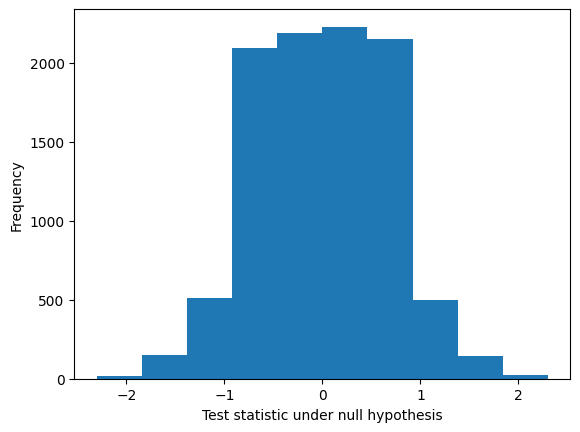

In [27]:
plt.hist(null_stats, bins=10)
plt.xlabel('Test statistic under null hypothesis')
plt.ylabel('Frequency')
plt.show()

### P-values

This means that it's at least possible that `test_stat` (from the original experimental data) was due to chance as it is consistent with the null hypothesis, even if not all that likely.

To see exactly how likely such differences (i.e., as big as `test_stat`) are under the null, we can simply compute the proportion of 10,000 values in `null_stats` that are equal to or greater than `test_stat`.

This proportion is an estimate of what is called a **P-value**, or the chance, based on the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.

For example, if 4,000 of the total 10,000 values were >= `test_stat`, the p-value would be 0.40. This means that, if the null hypothesis were true, we'd expect to see a difference like `test_stat` (or even bigger) 40% of the time (if we somehow had the money to re-run our experiment 10,000 times).

**Exercise 8**

Create a function called `compute_p_value` that takes a test statistic for a real sample of data and a numpy array of simulated test statistics and returns the p-value. Then compute the p-value for `test_stat` and `null_stats` and store the result in a variable called `p_value`.

In [28]:
# Your code goes here.

def compute_p_value(test_stat: float, null_stats: np.array): 
    p_value = 0
    for x in null_stats: 
        if x >= test_stat:
            p_value += 1
    
    return p_value / len(null_stats)

p_value = compute_p_value(test_stat, null_stats)

In [29]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if bool(p_value == float('7330.0'[::-1])):
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


The proportion (p-value) just calculated refers to all of the values in the histogram below to the right of the red line.

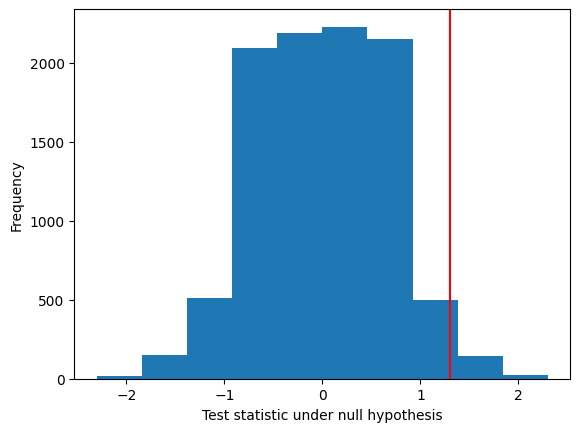

In [30]:
plt.hist(null_stats, bins=10)
plt.xlabel('Test statistic under null hypothesis')
plt.ylabel('Frequency')
plt.axvline(test_stat, color='red')
plt.show()

If the null hypothesis were true, the chance that we see a difference between groups like the one we observed is very low (less than 4%). Based on this information, we can either decide to reject the null hypothesis (in favor of the alternative hypothesis), or, we say that we "fail to reject" the null hypothesis. Our p-value indicates that our experimental results could certaintly be due to chance, though we'd only expect that misleading result about 4 times if we re-ran out experiment 100 times. Thus, whether or not to reject is a hard call.

It is common to select what is called a **p-value cutoff** for rejecting the null hypothesis before we analyze our data. In many cases, the value is selected to be 0.05. Since 0.04 < 0.05, we could reject the null in this case.

### Types of Tests

Hypothesis tests that involve permutation and simulation like the above are called **permutation tests**.

More common in psychology are **parametric tests** which rely on basic assumptions about the data that avoid the need to run simulations. One of these you've heard of before that can be used for tests of differences between groups is the **independent samples t-test**. T-tests use a test statistic called a t-statistic that, like ours above, is proportional to the difference between groups, but different in that the difference is relative to the variation in the data. We will not review it in detail today, but you can use this test or other parametric tests in your projects (if they involve differences between groups) later in the course using their simple Python implementations.

A similar dataset is loaded below, and an independent samples t-test is performed. The output is the test statistic and the p-value.

In [31]:
# load more craik-style data
mem2 = load_craik_tulving(v=2)

# scores for the two groups
deep_scores2 = mem2[mem2.condition == 'deep']['score'].values
shallow_scores2 = mem2[mem2.condition == 'shallow']['score'].values

In [32]:
# import t-test function
from scipy.stats import ttest_ind

# run the t-test
t_stat, pval = ttest_ind(deep_scores2, shallow_scores2, equal_var=True)

# print the results
print(t_stat, pval)

3.307475463158256 0.0039161414885950105


### Mental Rotation

In 1971, Shepard and Metzler ran an experiment using pairs of shape stimuli. In some conditions (within-subjects), one of the shapes was the same as the other but rotated somewhere in the range of 0-180 degress with respect to the other shape. Participants were tasked to indicate whether or not the shapes were identical up to a rotational transformation (are they the same if you rotate one of them). Reaction time was recorded. Shepard and Metzler suspected that people solve this problem by "mentally rotating" the shapes in their minds at a constant rate, such that larger differences in rotation between the stimuli will take longer to mentally align.

Data of this form for a single participant are loaded and dispalyed below. `angle` is the angle of difference between the unrotated shape and its rotated counterpart. `rt` is how long in milliseconds it took the participant to determine whether the shapes were the same.

In [33]:
rotations = load_shepard()
rotations

,angle,rt
0,0,1023
1,20,1167
2,40,1382
3,60,1578
4,80,1842
5,100,1976
6,120,2198
7,140,2445
8,160,2583
9,180,2791


Below is a scatter plot of angle against reaction time. 

**Interpretation:** Note the strong linear relationship, indicating that time to process the stimuli increases at a **constant rate** with angle of stimulus difference.

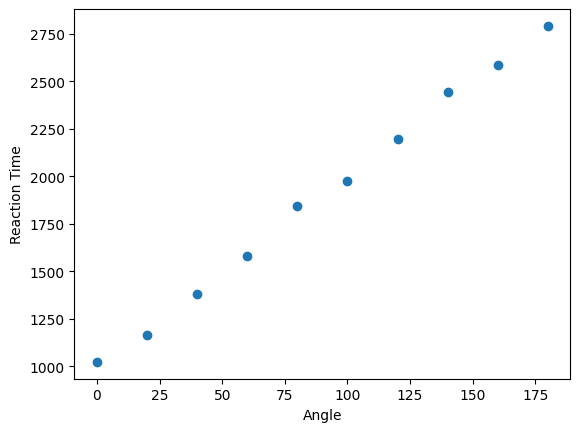

In [34]:
plt.scatter(rotations['angle'], rotations['rt'])
plt.xlabel('Angle')
plt.ylabel('Reaction Time')
plt.show()

**Correlation**

Statistical tests that concern differences between groups are essentially testing for a relationship for a categorical variable (e.g., one of two categories of processing condition) and a numerical variable (e.g., reaction time or number of items recalled). When the variables that we suspect might be related are both numeric, we can instead measure the **correlation**, also known as the "linear correlation" between two numeric variables.

Linear correlation is measured using the **correlation coefficient** *r*. Assuming x and y have already standardized (i.e., `x_standardized = (x - x_mean) / x_std`, same for `y`)  *r* is just the average product of corresponding x and y values:

$r = \frac{\sum x_i y_i}{n}$.

The value of *r* ranges from -1 to 1, where values closer to 0 represent weaker correlation, 0 represent no correlation, positive values representing positive correlation (i.e., x goes up when y goes up), and negative values representing negative correlation (e.g., y goes down when x goes up).

**Exercise 9**

- Create a function called `standardize` that takes a single input array and returns an array of the standardized values from the same array.
- Create function called `correlation` that takes two numpy arrays as input and makes use of `standardize` to compute and return the correlation coefficient.

In [63]:
# Your code goes here.
def standardize(array: np.array): return (array - np.mean(array)) / np.std(array)

def correlation(arr1: np.array, arr2: np.array):
    arr1_standardized = standardize(arr1)
    arr2_standardized = standardize(arr2)
    
    return np.mean(arr1_standardized * arr2_standardized)

In [64]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if bool(correlation(np.array([1, 2]), np.array([99, 100])) == 1.0):
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


Run the cell below and move the slider control to to see datasets that would produce coefficients ranging from -1 to 1.

In [37]:
explore_pearson()

interactive(children=(FloatSlider(value=1.0, description='strength', max=1.0, min=-1.0, step=0.01), Output()),…

We can compute the correlation between angle and rt in perform hypothesis testing with Shepard and Metzler's data by using the `pearsonr` function from scipy. The null hypothesis is that there is no relationship (r = 0).

In [38]:
from scipy.stats import pearsonr
pearsonr(rotations['angle'], rotations['rt'])

PearsonRResult(statistic=np.float64(0.9989362301597046), pvalue=np.float64(5.59518247415802e-12))

### Nonlinear Correlation

In 1952, Hick showed that reaction time was related to the number of choices in a decision-making task. 

In one condition of his within-subjects experiment, you would expect to see one of two colored
shapes (e.g., red or blue) and be tasked to press a button corresponding to the color of the shape 
(e.g, "r" button for red and "b" button for blue). In another condition, there could be more choices
(red, blue, green, yellow, etc.), as well as a button for each.

Hick found that the more choices involved, the longer the reaction time. This is known as Hick's Law.
However, the relationship is not linear as in the case of Shepard and Metzler's experiment.

The below cell loads a dataset of this form. The `n_alternatives` column describes the number of alternatives on a particular trial and the `rt` column contains reaction times for the corresponding trial.

In [39]:
choices = load_hick()
choices

,n_alternatives,rt
0,1,182.9
1,2,248.5
2,3,288.5
3,4,306.7
4,5,327.8
5,6,327.3
6,7,351.0
7,8,347.3
8,9,356.1
9,10,359.1


The cell below plots the nonlinear relationship between the two variables.

<Axes: xlabel='n_alternatives', ylabel='rt'>

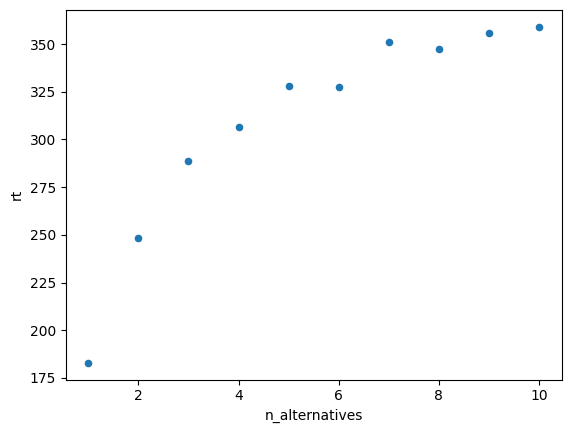

In [40]:
choices.plot(kind='scatter', x='n_alternatives', y='rt')

Because you could make a passable approximation of the above using a straight line, the standard correlation coefficient is still a relatively high value. However it's still an underestimate.

In [41]:
correlation(choices['n_alternatives'], choices['rt'])

np.float64(0.8096888163109112)

One way to better assess the strength of the relationship that Hick found is to transform the variables into ranks (we'll see why later). That is, values such as [400, 200] would be transformed into [2, 1]. (Note that the `n_alternatives` variable is already of this form)

**Exercise 10**

Use the .rank() rank pandas method to add a new column called `rt_ranks` with the rank-transformed values from the `rt` column onto the `choices` dataframe.

In [44]:
# Your code goes here.
choices["rt_ranks"] = choices["rt"].rank()


In [45]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if choices['rt_ranks'].mean() == 5.5:
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


Now let's try another scatter plot, but this time plotting rt ranks against `n_alternatives`.

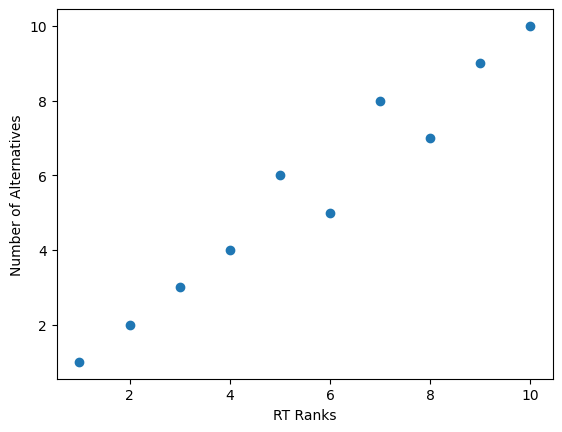

In [46]:
plt.scatter(
    choices['rt_ranks'].values, 
    choices['n_alternatives'].values
)
plt.xlabel('RT Ranks')
plt.ylabel('Number of Alternatives')
plt.show()

Transforming our variables into ranks turned the non-linear relationship into a linear one. Now we have a set of data where the correlation coefficient applies.

Correlation between variables converted to ranks is way to quantify non-linear correlation. The resulting score, which also varies between -1 and 1, is called **Spearman's** *rho*.

Note: Transforming values into ranks also has the effect of creating equally spaced intervals between values. This is also useful in cases where variables rating scales. For example, when people rate the similarity between two stimuli as being a "7 out of 10", we know that 7 is greater than 6, but we don't know if the "mental interval" between 6-7 is the same as the one between 7-8.

**Question 11**

Create a function called `spearman` that takes two numpy arrays and returns the linear correlation between rank-transformed versions of the input arrays. You can transform an array using `pd.Series(my_array).rank()`.

In [65]:
# Your code goes here.
def spearman(arr1: np.array, arr2: np.array): 
    rank_1 = pd.Series(arr1).rank()
    rank_2 = pd.Series(arr2).rank()
    return correlation(rank_1, rank_2)


spearman(choices['rt'], choices['n_alternatives'])

np.float64(0.9757575757575758)

In [66]:
# RUN THIS CELL TO TEST YOUR SOLUTION

# DO NOT MODIFY
if spearman(choices['rt'], choices['n_alternatives'])==0.9757575757575758:
    print('CORRECT')
else:
    print('INCORRECT')

CORRECT


Running the cell below shows that the spearman (nonlinear) correlation is higher than the linear correlation.

In [67]:
spearman(choices['rt'], choices['n_alternatives'])

np.float64(0.9757575757575758)

Again, we can do hypothesis testing using scipy.

In [68]:
from scipy.stats import spearmanr
spearmanr(choices['rt'], choices['n_alternatives'])

SignificanceResult(statistic=np.float64(0.9757575757575757), pvalue=np.float64(1.4675461874042197e-06))

Run the cell below and move the slider control to to see datasets that would produce coefficients ranging from -1 to 1.

In [69]:
explore_spearman()

interactive(children=(FloatSlider(value=1.0, description='strength', max=1.0, min=-1.0, step=0.01), Output()),…